# 尝试向原图添加破损 Try adding damage to the original image

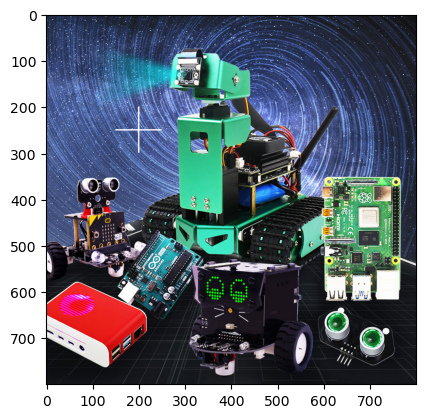

In [1]:
#尝试向原图添加破损 Try adding damage to the original image
import cv2 
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('yahboom.jpg',1)
for i in range(200,300):
    img[i,200] = (255,255,255)
    img[i,200+1] = (255,255,255)
    img[i,200-1] = (255,255,255)
for i in range(150,250):
    img[250,i] = (255,255,255)
    img[250+1,i] = (255,255,255)
    img[250-1,i] = (255,255,255)
cv2.imwrite('damaged.jpg',img)
# cv2.imshow('image',img)
# cv2.waitKey(0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# 尝试修补破损 Try to fix the damage

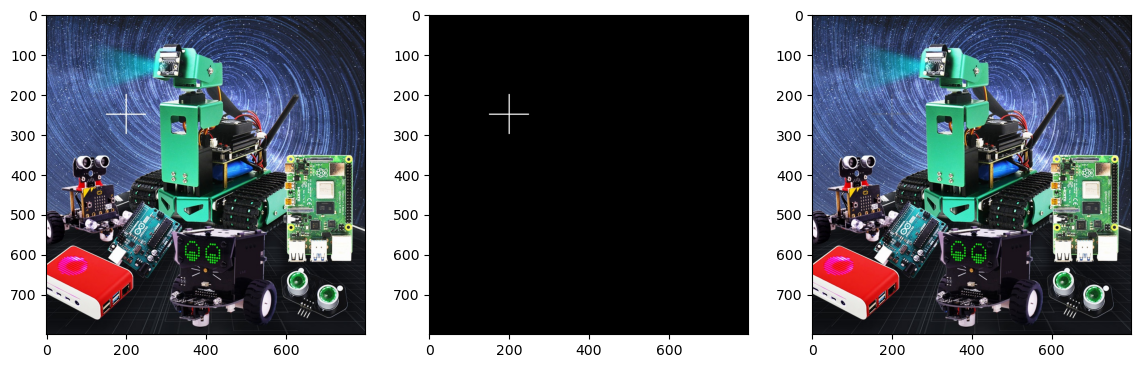

In [2]:
#1 坏图 2 掩膜 3 inpaint  1 Bad image 2 Mask 3 Inpaint
import cv2 
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('damaged.jpg',1)
#cv2.imshow('src',img)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
paint = np.zeros((height,width,1),np.uint8)

for i in range(200,300):
    paint[i,200] = 255
    paint[i,200+1] = 255
    paint[i,200-1] = 255
for i in range(150,250):
    paint[250,i] = 255
    paint[250+1,i] = 255
    paint[250-1,i] = 255
#cv2.imshow('paint',paint)
#1 src 2 mask
imgDst = cv2.inpaint(img,paint,3,cv2.INPAINT_TELEA)

# cv2.imshow('image',imgDst)
# cv2.waitKey(0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
paint = cv2.cvtColor(paint, cv2.COLOR_BGR2RGB)
imgDst = cv2.cvtColor(imgDst, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(14, 9), dpi=100)#设置绘图区域的大小和像素 Set the size and pixels of the drawing area
plt.subplot(131)  # 一行三列第一个  The first one in a row and three columns
plt.imshow(img)
plt.subplot(132)  # 一行三列第二个 The second one in the third column
plt.imshow(paint)
plt.subplot(133)  # 一行三列第三个 The third one in a row and three columns
plt.imshow(imgDst)

plt.show()